In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [3]:
noreuse = pd.read_csv('1711699885---29-03-2024---08:11:25.noreuse.stage3.csv',
  names=["File", "Condition", "Metric", "Value"])
reuse = pd.read_csv('1711702292---29-03-2024---08:51:32.reuse.stage3.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_enabled,rss,151330816
1,Init/Prelude.lean,reuse_across_ctor_enabled,num_alloc,1321786
2,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_alloc,26198906
3,Init/Prelude.lean,reuse_across_ctor_enabled,num_dealloc,1273534
4,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_dealloc,25817637
...,...,...,...,...
8495,Lake/Main.lean,reuse_across_ctor_enabled,num_segments,4
8496,Lake/Main.lean,reuse_across_ctor_enabled,num_pages,3715
8497,Lake/Main.lean,reuse_across_ctor_enabled,num_exports,0
8498,Lake/Main.lean,reuse_across_ctor_enabled,num_recycled_pages,742


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147406848
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538112
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156876
...,...,...,...,...
8495,Lake/Main.lean,reuse_across_ctor_disabled,num_segments,4
8496,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715
8497,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
8498,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743


In [4]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
print(f"time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}")

time (reuse): 0:35:30.234000 | time (noreuse): 0:40:34.567000


In [5]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147406848,reuse_across_ctor_enabled,151330816
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689,reuse_across_ctor_enabled,1321786
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538112,reuse_across_ctor_enabled,26198906
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439,reuse_across_ctor_enabled,1273534
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156876,reuse_across_ctor_enabled,25817637
...,...,...,...,...,...,...
8495,Lake/Main.lean,reuse_across_ctor_disabled,num_segments,4,reuse_across_ctor_enabled,4
8496,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715,reuse_across_ctor_enabled,3715
8497,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0,reuse_across_ctor_enabled,0
8498,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743,reuse_across_ctor_enabled,742


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Server/Utils.lean,1126,2859,1733,60.615600
1,Lean/Elab/PreDefinition/Basic.lean,2819,6095,3276,53.748975
2,Lean/Elab/CheckTactic.lean,1782,3435,1653,48.122271
3,Lake/Config/Glob.lean,496,926,430,46.436285
4,Lean/Elab/Tactic/RCases.lean,9578,17718,8140,45.941980
...,...,...,...,...,...
845,Lean/Elab/Util.lean,3228,2056,-1172,-57.003891
846,Lean/Meta/Tactic/Constructor.lean,1511,945,-566,-59.894180
847,Lean/Compiler/IR/UnboxResult.lean,895,533,-362,-67.917448
848,Lean/Compiler/LCNF/MonoTypes.lean,2572,1421,-1151,-80.999296


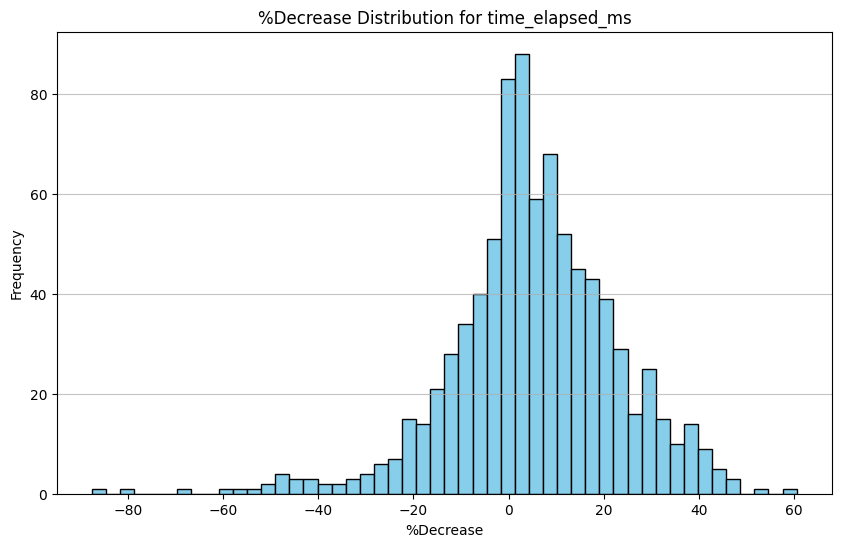

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/Nat/Bitwise/Basic.lean,92258304,97075200,4816896,4.962025
1,Init/Data/Int/Basic.lean,98320384,103297024,4976640,4.817796
2,Init/WF.lean,101638144,106717184,5079040,4.759346
3,Init/Data/Prod.lean,85430272,89489408,4059136,4.535884
4,Init/Data/Fin/Basic.lean,96419840,100876288,4456448,4.417736
...,...,...,...,...,...
845,Lean/Elab/PreDefinition/WF.lean,332447744,334278656,1830912,0.547720
846,Lean/Compiler.lean,271314944,272592896,1277952,0.468813
847,Lean/Elab/Tactic.lean,373837824,375517184,1679360,0.447213
848,Lean/PrettyPrinter/Delaborator.lean,227749888,228708352,958464,0.419077


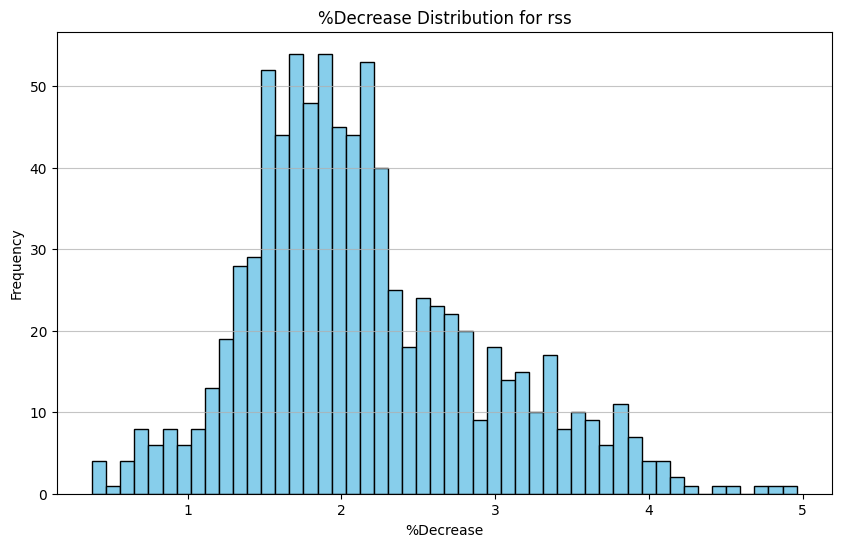

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Data/Format.lean,2648284,2840952,192668,6.781811
1,Lean/Meta/Coe.lean,11295176,12018127,722951,6.015505
2,Lean/Meta/Tactic/Rewrite.lean,6673295,6900193,226898,3.288285
3,Lean/Data/Lsp/Internal.lean,7965523,8232547,267024,3.243516
4,Lean/Server/Rpc/Deriving.lean,18330790,18823815,493025,2.619156
...,...,...,...,...,...
845,Init/SimpLemmas.lean,5556699,5473473,-83226,-1.520534
846,Init/PropLemmas.lean,8611360,8482281,-129079,-1.521749
847,Init/Data/Option/Basic.lean,4570321,4499867,-70454,-1.565691
848,Init/Control/StateCps.lean,2864593,2818149,-46444,-1.648032


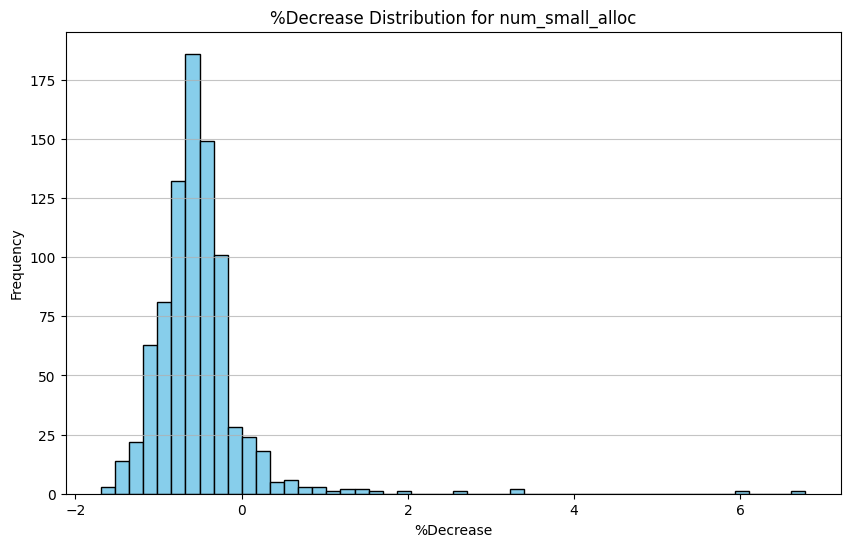

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Data/Format.lean,109938,137690,27752,20.155422
1,Lean/Server/Rpc/Deriving.lean,755644,848615,92971,10.955616
2,Lean/Meta/Tactic/Rewrite.lean,258123,284497,26374,9.270397
3,Lean/Meta/Coe.lean,491859,537971,46112,8.571466
4,Lean/Data/Lsp/Internal.lean,366489,397898,31409,7.893732
...,...,...,...,...,...
845,Lean/Server/CompletionItemData.lean,62131,62017,-114,-0.183821
846,Lean/Meta/LevelDefEq.lean,341207,340504,-703,-0.206459
847,Lean/Util/FileSetupInfo.lean,48296,48192,-104,-0.215803
848,Lean/Data/LOption.lean,42005,41913,-92,-0.219502


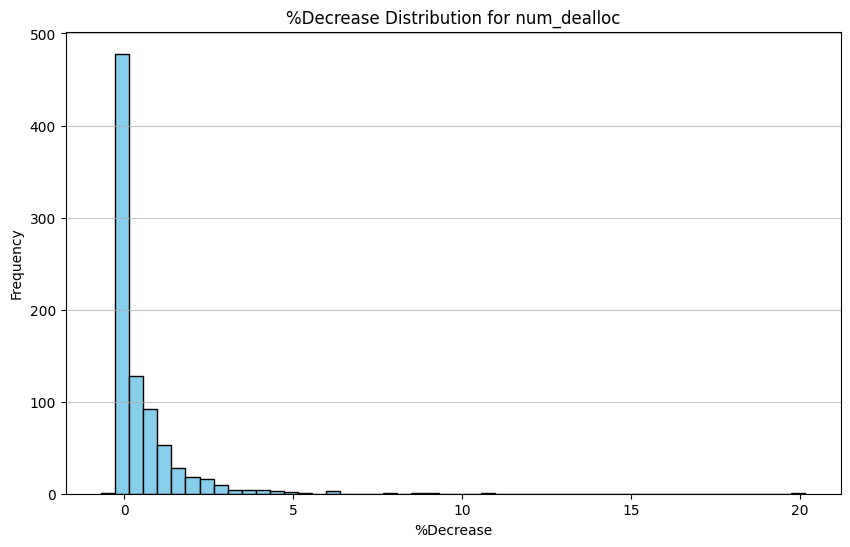

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Data/Format.lean,2307860,2491860,184000,7.384042
1,Lean/Meta/Coe.lean,10805958,11513823,707865,6.147958
2,Lean/Meta/Tactic/Rewrite.lean,6182478,6401248,218770,3.417615
3,Lean/Data/Lsp/Internal.lean,7552878,7811653,258775,3.312679
4,Lean/Server/Rpc/Deriving.lean,17689432,18161447,472015,2.598994
...,...,...,...,...,...
845,Init/Data/Option/Instances.lean,2136367,2102505,-33862,-1.610555
846,Init/Data/Option/Basic.lean,4319431,4248977,-70454,-1.658140
847,Init/Coe.lean,1395766,1372438,-23328,-1.699749
848,Init/Control/StateCps.lean,2580395,2533958,-46437,-1.832588


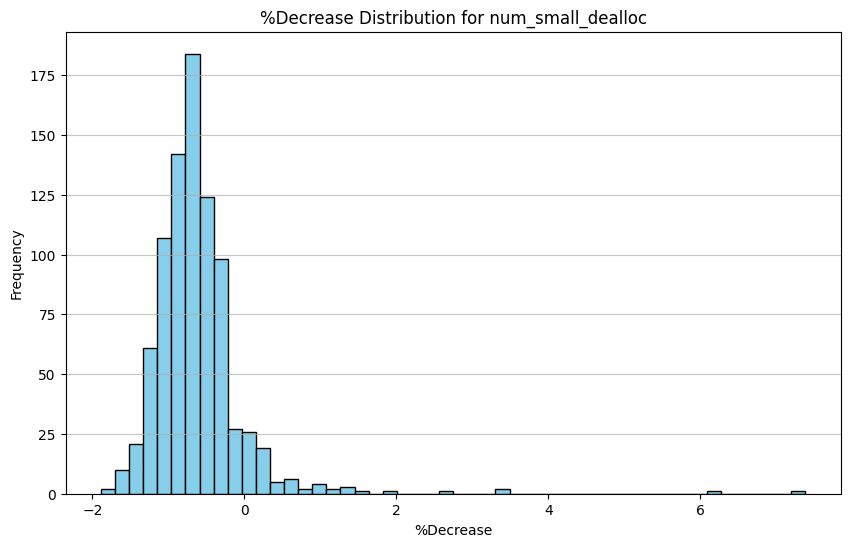

<Axes: >

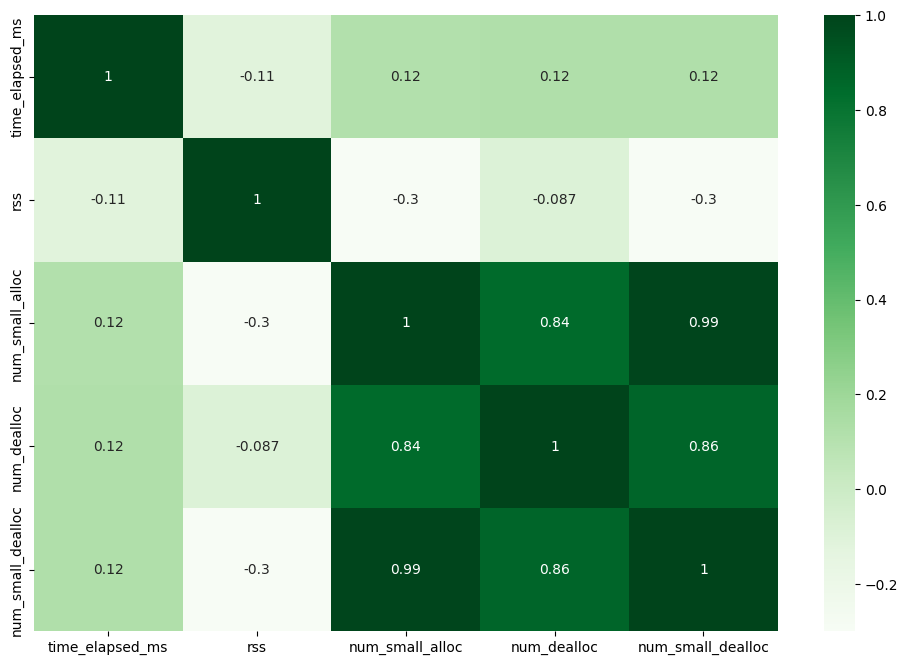

In [6]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,40253,4034116
Lean/Elab/Do.lean,32947,6328540
Lean/Elab/Quotation.lean,27980,3926757
Lean/Meta/Match/MatchEqs.lean,26102,2950442
Lean/Elab/App.lean,25978,4005911
...,...,...
Lean/Runtime.lean,139,45677
Lean/Meta/TransparencyMode.lean,135,63389
Init/Data/Int/Bitwise.lean,128,61700


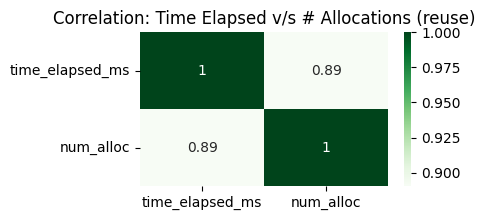

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,52535,4060739
Lean/Elab/Quotation.lean,34550,4037147
Lean/Elab/Match.lean,34524,3847469
Lean/Meta/Match/MatchEqs.lean,34063,3015219
Lean/Elab/Do.lean,32177,6328533
...,...,...
Init/Data/ByteArray.lean,143,55552
Lean/Runtime.lean,141,45677
Init/Data/FloatArray.lean,140,55502


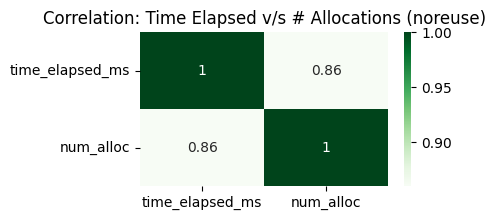

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,52535,4060739
Lean/Elab/Tactic/Omega/Frontend.lean,40253,4034116
Lean/Elab/Quotation.lean,34550,4037147
Lean/Elab/Match.lean,34524,3847469
Lean/Meta/Match/MatchEqs.lean,34063,3015219
...,...,...
Init/Data/Cast.lean,130,48545
Init/Data/Int/Bitwise.lean,128,61700
Init/Data/Char.lean,117,53141


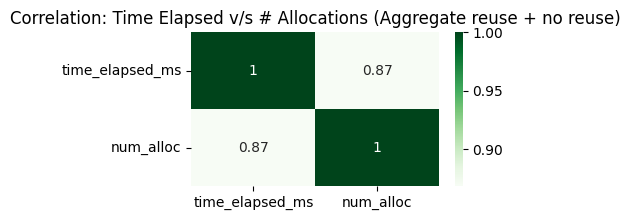

In [7]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()
